Training samples: (10, 500, 2), Targets: (10, 500, 2)
Training...
Epoch 0 Loss: 1.003583
Epoch 20 Loss: 0.601096
Epoch 40 Loss: 0.389605
Epoch 60 Loss: 0.234606
Epoch 80 Loss: 0.110954
Epoch 100 Loss: 0.087527
Epoch 120 Loss: 0.041596
Epoch 140 Loss: 0.004853
Epoch 160 Loss: 0.002468
Epoch 180 Loss: 0.001310
Epoch 200 Loss: 0.000210
Epoch 220 Loss: 0.000024
Epoch 240 Loss: 0.000002
Epoch 260 Loss: 0.000000
Epoch 280 Loss: 0.000000
Training samples: (10, 500, 2), Targets: (10, 500, 2)
Training...
Epoch 0 Loss: 1.003583
Epoch 20 Loss: 0.601096
Epoch 40 Loss: 0.389605
Epoch 60 Loss: 0.234606
Epoch 80 Loss: 0.110954
Epoch 100 Loss: 0.087527
Epoch 120 Loss: 0.041596
Epoch 140 Loss: 0.004853
Epoch 160 Loss: 0.002468
Epoch 180 Loss: 0.001310
Epoch 200 Loss: 0.000210
Epoch 220 Loss: 0.000024
Epoch 240 Loss: 0.000002
Epoch 260 Loss: 0.000000
Epoch 280 Loss: 0.000000


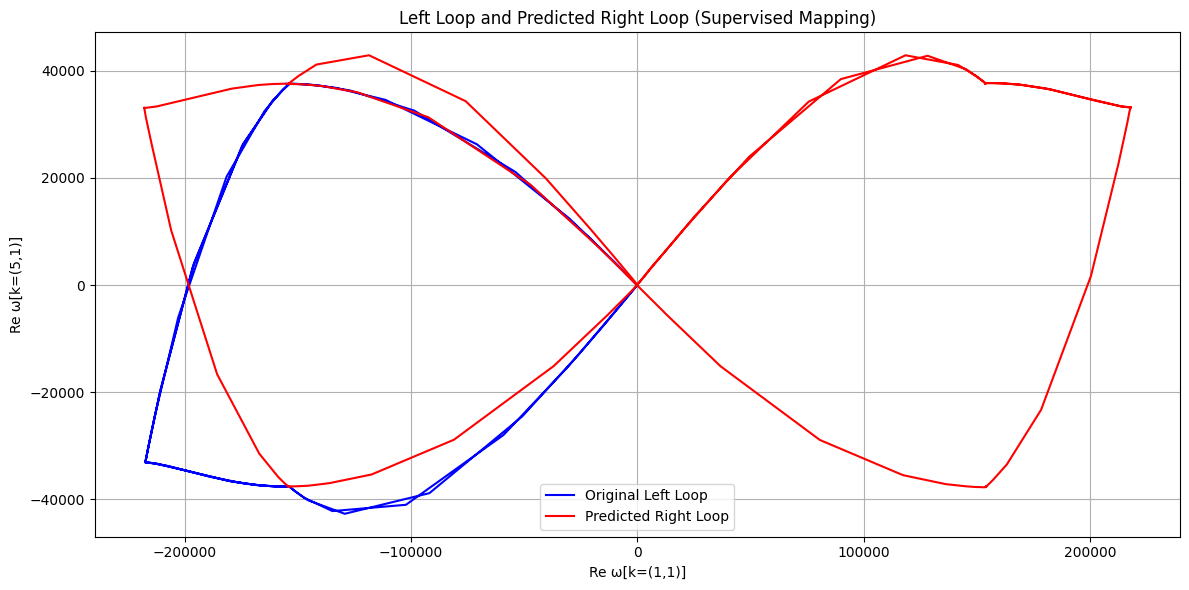

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")

# Set seed
np.random.seed(42)
torch.manual_seed(42)

# Load data
data = np.loadtxt(r"C:\Users\lenovo\Downloads\projection.dat")[:10000]

# Normalize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define loop length (adjust based on your orbit shape)
LOOP_LENGTH = 500
NUM_LOOPS = len(data_scaled) // (2 * LOOP_LENGTH)

# Extract full left/right loop pairs
X, Y = [], []
for i in range(NUM_LOOPS):
    left = data_scaled[i * 2 * LOOP_LENGTH : i * 2 * LOOP_LENGTH + LOOP_LENGTH]
    right = data_scaled[i * 2 * LOOP_LENGTH + LOOP_LENGTH : (i+1) * 2 * LOOP_LENGTH]
    if len(left) == LOOP_LENGTH and len(right) == LOOP_LENGTH:
        X.append(left)
        Y.append(right)

X = np.array(X)
Y = np.array(Y)
print(f"Training samples: {X.shape}, Targets: {Y.shape}")

# Train/test split
split = int(0.85 * len(X))
X_train, X_test = torch.FloatTensor(X[:split]), torch.FloatTensor(X[split:])
Y_train, Y_test = torch.FloatTensor(Y[:split]), torch.FloatTensor(Y[split:])

train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=16, shuffle=True)

# Define model: LSTM encoder + dense decoder
class LeftToRightLoopPredictor(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, loop_len=LOOP_LENGTH):
        super().__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True)
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, loop_len * input_size)
        )
        self.loop_len = loop_len
        self.input_size = input_size

    def forward(self, x):
        _, (h, _) = self.encoder(x)
        z = h[-1]  # Use final hidden state
        out = self.decoder(z)
        return out.view(-1, self.loop_len, self.input_size)

# Initialize
model = LeftToRightLoopPredictor()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Train loop
EPOCHS = 300
print("Training...")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f"Epoch {epoch} Loss: {total_loss / len(train_loader):.6f}")

# Predict from test sample
model.eval()
with torch.no_grad():
    idx = 0  # pick any sample from test set
    left_in = X_test[idx].unsqueeze(0)
    true_right = Y_test[idx]
    pred_right = model(left_in).squeeze(0)
    left_orig = scaler.inverse_transform(left_in.squeeze(0).numpy())
    right_orig = scaler.inverse_transform(true_right.numpy())
    right_pred = scaler.inverse_transform(pred_right.numpy())

# Combine for visualization
complete_pred = np.vstack([left_orig, right_pred])
complete_true = np.vstack([left_orig, right_orig])

# Plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")

# Set seed
np.random.seed(42)
torch.manual_seed(42)

# Load data
data = np.loadtxt(r"C:\Users\lenovo\Downloads\projection.dat")[:10000]

# Normalize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define loop length (adjust based on your orbit shape)
LOOP_LENGTH = 500
NUM_LOOPS = len(data_scaled) // (2 * LOOP_LENGTH)

# Extract full left/right loop pairs
X, Y = [], []
for i in range(NUM_LOOPS):
    left = data_scaled[i * 2 * LOOP_LENGTH : i * 2 * LOOP_LENGTH + LOOP_LENGTH]
    right = data_scaled[i * 2 * LOOP_LENGTH + LOOP_LENGTH : (i+1) * 2 * LOOP_LENGTH]
    if len(left) == LOOP_LENGTH and len(right) == LOOP_LENGTH:
        X.append(left)
        Y.append(right)

X = np.array(X)
Y = np.array(Y)
print(f"Training samples: {X.shape}, Targets: {Y.shape}")

# Train/test split
split = int(0.85 * len(X))
X_train, X_test = torch.FloatTensor(X[:split]), torch.FloatTensor(X[split:])
Y_train, Y_test = torch.FloatTensor(Y[:split]), torch.FloatTensor(Y[split:])

train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=16, shuffle=True)

# Define model: LSTM encoder + dense decoder
class LeftToRightLoopPredictor(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, loop_len=LOOP_LENGTH):
        super().__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True)
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, loop_len * input_size)
        )
        self.loop_len = loop_len
        self.input_size = input_size

    def forward(self, x):
        _, (h, _) = self.encoder(x)
        z = h[-1]  # Use final hidden state
        out = self.decoder(z)
        return out.view(-1, self.loop_len, self.input_size)

# Initialize
model = LeftToRightLoopPredictor()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Train loop
EPOCHS = 300
print("Training...")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f"Epoch {epoch} Loss: {total_loss / len(train_loader):.6f}")

# Predict from test sample
model.eval()
with torch.no_grad():
    idx = 0  # pick any sample from test set
    left_in = X_test[idx].unsqueeze(0)
    true_right = Y_test[idx]
    pred_right = model(left_in).squeeze(0)
    left_orig = scaler.inverse_transform(left_in.squeeze(0).numpy())
    right_orig = scaler.inverse_transform(true_right.numpy())
    right_pred = scaler.inverse_transform(pred_right.numpy())

# Combine for visualization
complete_pred = np.vstack([left_orig, right_pred])
complete_true = np.vstack([left_orig, right_orig])

# Plot
# Plot only original left loop and predicted right loop
plt.figure(figsize=(12, 6))
plt.plot(left_orig[:, 0], left_orig[:, 1], label='Original Left Loop', color='blue')
plt.plot(right_pred[:, 0], right_pred[:, 1], label='Predicted Right Loop', color='red')
plt.title("Left Loop and Predicted Right Loop (Supervised Mapping)")
plt.xlabel("Re ω[k=(1,1)]")
plt.ylabel("Re ω[k=(5,1)]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [1]:
import numpy as np

# Load the full file
data = np.loadtxt(r"C:\Users\lenovo\Downloads\projection.dat")

# Print number of data points (rows) and number of columns (features)
print(f"Total data points (rows): {data.shape[0]}")
print(f"Number of features (columns): {data.shape[1]}")


Total data points (rows): 10000
Number of features (columns): 2


Training samples: (10, 500, 2), Targets: (10, 500, 2)
Training...
Epoch 0 Loss: 1.003583
Epoch 20 Loss: 0.601096
Epoch 40 Loss: 0.389605
Epoch 60 Loss: 0.234606
Epoch 80 Loss: 0.110954
Epoch 100 Loss: 0.087527
Epoch 120 Loss: 0.041596
Epoch 140 Loss: 0.004853
Epoch 160 Loss: 0.002468
Epoch 180 Loss: 0.001310
Epoch 200 Loss: 0.000210
Epoch 220 Loss: 0.000024
Epoch 240 Loss: 0.000002
Epoch 260 Loss: 0.000000
Epoch 280 Loss: 0.000000
Training samples: (10, 500, 2), Targets: (10, 500, 2)
Training...
Epoch 0 Loss: 1.003583
Epoch 20 Loss: 0.601096
Epoch 40 Loss: 0.389605
Epoch 60 Loss: 0.234606
Epoch 80 Loss: 0.110954
Epoch 100 Loss: 0.087527
Epoch 120 Loss: 0.041596
Epoch 140 Loss: 0.004853
Epoch 160 Loss: 0.002468
Epoch 180 Loss: 0.001310
Epoch 200 Loss: 0.000210
Epoch 220 Loss: 0.000024
Epoch 240 Loss: 0.000002
Epoch 260 Loss: 0.000000
Epoch 280 Loss: 0.000000


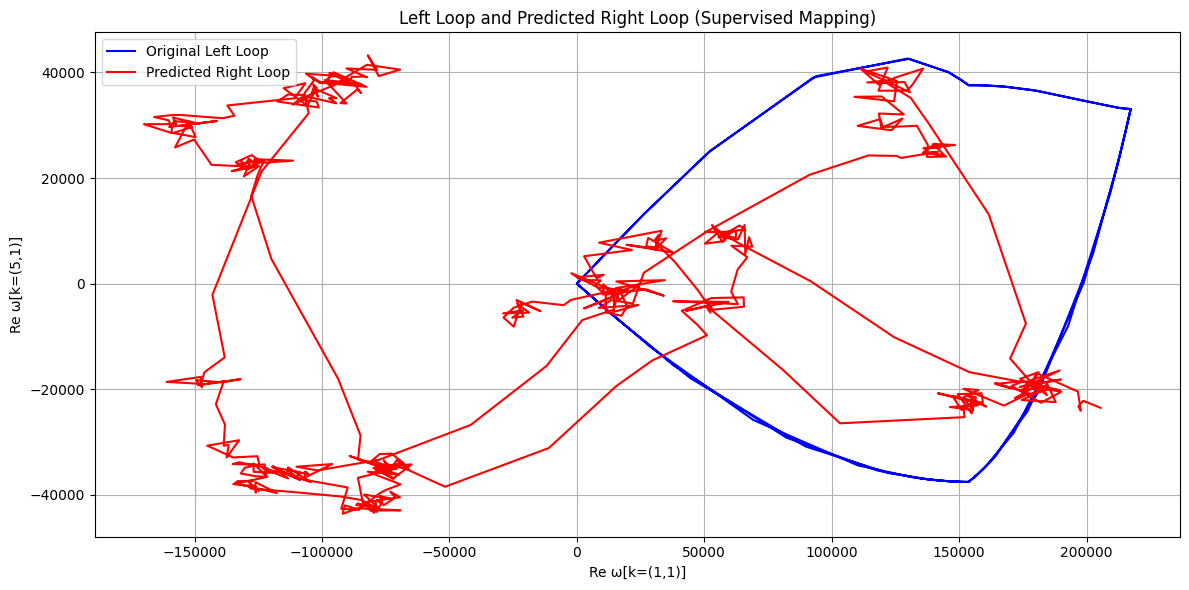

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")

# Set seed
np.random.seed(42)
torch.manual_seed(42)

# Load data
data = np.loadtxt(r"C:\Users\lenovo\Downloads\projection.dat")[:10000]

# Normalize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define loop length (adjust based on your orbit shape)
LOOP_LENGTH = 500
NUM_LOOPS = len(data_scaled) // (2 * LOOP_LENGTH)

# Extract full left/right loop pairs
X, Y = [], []
for i in range(NUM_LOOPS):
    left = data_scaled[i * 2 * LOOP_LENGTH : i * 2 * LOOP_LENGTH + LOOP_LENGTH]
    right = data_scaled[i * 2 * LOOP_LENGTH + LOOP_LENGTH : (i+1) * 2 * LOOP_LENGTH]
    if len(left) == LOOP_LENGTH and len(right) == LOOP_LENGTH:
        X.append(left)
        Y.append(right)

X = np.array(X)
Y = np.array(Y)
print(f"Training samples: {X.shape}, Targets: {Y.shape}")

# Train/test split
split = int(0.85 * len(X))
X_train, X_test = torch.FloatTensor(X[:split]), torch.FloatTensor(X[split:])
Y_train, Y_test = torch.FloatTensor(Y[:split]), torch.FloatTensor(Y[split:])

train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=16, shuffle=True)

# Define model: LSTM encoder + dense decoder
class LeftToRightLoopPredictor(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, loop_len=LOOP_LENGTH):
        super().__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True)
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, loop_len * input_size)
        )
        self.loop_len = loop_len
        self.input_size = input_size

    def forward(self, x):
        _, (h, _) = self.encoder(x)
        z = h[-1]  # Use final hidden state
        out = self.decoder(z)
        return out.view(-1, self.loop_len, self.input_size)

# Initialize
model = LeftToRightLoopPredictor()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Train loop
EPOCHS = 300
print("Training...")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f"Epoch {epoch} Loss: {total_loss / len(train_loader):.6f}")

# Predict from test sample
model.eval()
with torch.no_grad():
    idx = 0  # pick any sample from test set
    left_in = X_test[idx].unsqueeze(0)
    true_right = Y_test[idx]
    pred_right = model(left_in).squeeze(0)
    left_orig = scaler.inverse_transform(left_in.squeeze(0).numpy())
    right_orig = scaler.inverse_transform(true_right.numpy())
    right_pred = scaler.inverse_transform(pred_right.numpy())

# Combine for visualization
complete_pred = np.vstack([left_orig, right_pred])
complete_true = np.vstack([left_orig, right_orig])

# Plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")

# Set seed
np.random.seed(42)
torch.manual_seed(42)

# Load data
data = np.loadtxt(r"C:\Users\lenovo\Downloads\projection.dat")[:10000]

# Normalize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define loop length (adjust based on your orbit shape)
LOOP_LENGTH = 500
NUM_LOOPS = len(data_scaled) // (2 * LOOP_LENGTH)

# Extract full left/right loop pairs
X, Y = [], []
for i in range(NUM_LOOPS):
    left = data_scaled[i * 2 * LOOP_LENGTH : i * 2 * LOOP_LENGTH + LOOP_LENGTH]
    right = data_scaled[i * 2 * LOOP_LENGTH + LOOP_LENGTH : (i+1) * 2 * LOOP_LENGTH]
    if len(left) == LOOP_LENGTH and len(right) == LOOP_LENGTH:
        X.append(left)
        Y.append(right)

X = np.array(X)
Y = np.array(Y)
print(f"Training samples: {X.shape}, Targets: {Y.shape}")

# Train/test split
split = int(0.85 * len(X))
X_train, X_test = torch.FloatTensor(X[:split]), torch.FloatTensor(X[split:])
Y_train, Y_test = torch.FloatTensor(Y[:split]), torch.FloatTensor(Y[split:])

train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=16, shuffle=True)

# Define model: LSTM encoder + dense decoder
class LeftToRightLoopPredictor(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, loop_len=LOOP_LENGTH):
        super().__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True)
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, loop_len * input_size)
        )
        self.loop_len = loop_len
        self.input_size = input_size

    def forward(self, x):
        _, (h, _) = self.encoder(x)
        z = h[-1]  # Use final hidden state
        out = self.decoder(z)
        return out.view(-1, self.loop_len, self.input_size)

# Initialize
model = LeftToRightLoopPredictor()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Train loop
EPOCHS = 300
print("Training...")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f"Epoch {epoch} Loss: {total_loss / len(train_loader):.6f}")

# Predict from test sample
model.eval()
with torch.no_grad():
    idx = 1  # pick any sample from test set
    left_in = X_test[idx].unsqueeze(0)
    true_right = Y_test[idx]
    pred_right = model(left_in).squeeze(0)
    left_orig = scaler.inverse_transform(left_in.squeeze(0).numpy())
    right_orig = scaler.inverse_transform(true_right.numpy())
    right_pred = scaler.inverse_transform(pred_right.numpy())

# Combine for visualization
complete_pred = np.vstack([left_orig, right_pred])
complete_true = np.vstack([left_orig, right_orig])

# Plot
# Plot only original left loop and predicted right loop
plt.figure(figsize=(12, 6))
plt.plot(left_orig[:, 0], left_orig[:, 1], label='Original Left Loop', color='blue')
plt.plot(right_pred[:, 0], right_pred[:, 1], label='Predicted Right Loop', color='red')
plt.title("Left Loop and Predicted Right Loop (Supervised Mapping)")
plt.xlabel("Re ω[k=(1,1)]")
plt.ylabel("Re ω[k=(5,1)]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Training samples: (10, 500, 2), Targets: (10, 500, 2)
Training...
Epoch 0 Loss: 1.003583
Epoch 20 Loss: 0.601096
Epoch 40 Loss: 0.389605
Epoch 60 Loss: 0.234606
Epoch 80 Loss: 0.110954
Epoch 100 Loss: 0.087527
Epoch 120 Loss: 0.041596
Epoch 140 Loss: 0.004853
Epoch 160 Loss: 0.002468
Epoch 180 Loss: 0.001310
Epoch 200 Loss: 0.000210
Epoch 220 Loss: 0.000024
Epoch 240 Loss: 0.000002
Epoch 260 Loss: 0.000000
Epoch 280 Loss: 0.000000
Training samples: (5, 500, 2), Targets: (5, 500, 2)
Training...
Epoch 0 Loss: 0.991215
Epoch 20 Loss: 0.557516
Epoch 40 Loss: 0.270583
Epoch 60 Loss: 0.135942
Epoch 80 Loss: 0.009293
Epoch 100 Loss: 0.001264
Epoch 120 Loss: 0.000214
Epoch 140 Loss: 0.000023
Epoch 160 Loss: 0.000002
Epoch 180 Loss: 0.000000
Epoch 200 Loss: 0.000000
Epoch 220 Loss: 0.000000
Epoch 240 Loss: 0.000000
Epoch 260 Loss: 0.000000
Epoch 280 Loss: 0.000000


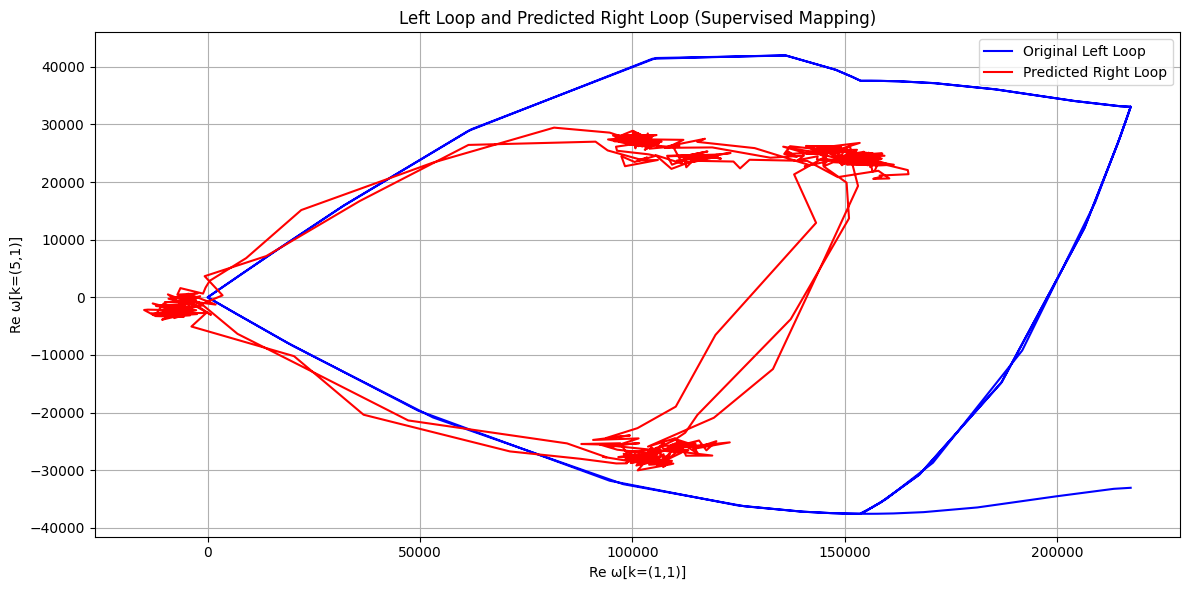

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")

# Set seed
np.random.seed(42)
torch.manual_seed(42)

# Load data
data = np.loadtxt(r"C:\Users\lenovo\Downloads\projection.dat")[:10000]

# Normalize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define loop length (adjust based on your orbit shape)
LOOP_LENGTH = 500
NUM_LOOPS = len(data_scaled) // (2 * LOOP_LENGTH)

# Extract full left/right loop pairs
X, Y = [], []
for i in range(NUM_LOOPS):
    left = data_scaled[i * 2 * LOOP_LENGTH : i * 2 * LOOP_LENGTH + LOOP_LENGTH]
    right = data_scaled[i * 2 * LOOP_LENGTH + LOOP_LENGTH : (i+1) * 2 * LOOP_LENGTH]
    if len(left) == LOOP_LENGTH and len(right) == LOOP_LENGTH:
        X.append(left)
        Y.append(right)

X = np.array(X)
Y = np.array(Y)
print(f"Training samples: {X.shape}, Targets: {Y.shape}")

# Train/test split
split = int(0.85 * len(X))
X_train, X_test = torch.FloatTensor(X[:split]), torch.FloatTensor(X[split:])
Y_train, Y_test = torch.FloatTensor(Y[:split]), torch.FloatTensor(Y[split:])

train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=16, shuffle=True)

# Define model: LSTM encoder + dense decoder
class LeftToRightLoopPredictor(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, loop_len=LOOP_LENGTH):
        super().__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True)
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, loop_len * input_size)
        )
        self.loop_len = loop_len
        self.input_size = input_size

    def forward(self, x):
        _, (h, _) = self.encoder(x)
        z = h[-1]  # Use final hidden state
        out = self.decoder(z)
        return out.view(-1, self.loop_len, self.input_size)

# Initialize
model = LeftToRightLoopPredictor()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Train loop
EPOCHS = 300
print("Training...")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f"Epoch {epoch} Loss: {total_loss / len(train_loader):.6f}")

# Predict from test sample
model.eval()
with torch.no_grad():
    idx = 0  # pick any sample from test set
    left_in = X_test[idx].unsqueeze(0)
    true_right = Y_test[idx]
    pred_right = model(left_in).squeeze(0)
    left_orig = scaler.inverse_transform(left_in.squeeze(0).numpy())
    right_orig = scaler.inverse_transform(true_right.numpy())
    right_pred = scaler.inverse_transform(pred_right.numpy())

# Combine for visualization
complete_pred = np.vstack([left_orig, right_pred])
complete_true = np.vstack([left_orig, right_orig])

# Plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")

# Set seed
np.random.seed(42)
torch.manual_seed(42)

# Load data
data = np.loadtxt(r"C:\Users\lenovo\Downloads\projection.dat")[:5000]

# Normalize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define loop length (adjust based on your orbit shape)
LOOP_LENGTH = 500
NUM_LOOPS = len(data_scaled) // (2 * LOOP_LENGTH)

# Extract full left/right loop pairs
X, Y = [], []
for i in range(NUM_LOOPS):
    left = data_scaled[i * 2 * LOOP_LENGTH : i * 2 * LOOP_LENGTH + LOOP_LENGTH]
    right = data_scaled[i * 2 * LOOP_LENGTH + LOOP_LENGTH : (i+1) * 2 * LOOP_LENGTH]
    if len(left) == LOOP_LENGTH and len(right) == LOOP_LENGTH:
        X.append(left)
        Y.append(right)

X = np.array(X)
Y = np.array(Y)
print(f"Training samples: {X.shape}, Targets: {Y.shape}")

# Train/test split
split = int(0.85 * len(X))
X_train, X_test = torch.FloatTensor(X[:split]), torch.FloatTensor(X[split:])
Y_train, Y_test = torch.FloatTensor(Y[:split]), torch.FloatTensor(Y[split:])

train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=16, shuffle=True)

# Define model: LSTM encoder + dense decoder
class LeftToRightLoopPredictor(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, loop_len=LOOP_LENGTH):
        super().__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True)
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, loop_len * input_size)
        )
        self.loop_len = loop_len
        self.input_size = input_size

    def forward(self, x):
        _, (h, _) = self.encoder(x)
        z = h[-1]  # Use final hidden state
        out = self.decoder(z)
        return out.view(-1, self.loop_len, self.input_size)

# Initialize
model = LeftToRightLoopPredictor()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Train loop
EPOCHS = 300
print("Training...")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f"Epoch {epoch} Loss: {total_loss / len(train_loader):.6f}")

# Predict from test sample
model.eval()
with torch.no_grad():
    idx = 0  # pick any sample from test set
    left_in = X_test[idx].unsqueeze(0)
    true_right = Y_test[idx]
    pred_right = model(left_in).squeeze(0)
    left_orig = scaler.inverse_transform(left_in.squeeze(0).numpy())
    right_orig = scaler.inverse_transform(true_right.numpy())
    right_pred = scaler.inverse_transform(pred_right.numpy())

# Combine for visualization
complete_pred = np.vstack([left_orig, right_pred])
complete_true = np.vstack([left_orig, right_orig])

# Plot
# Plot only original left loop and predicted right loop
plt.figure(figsize=(12, 6))
plt.plot(left_orig[:, 0], left_orig[:, 1], label='Original Left Loop', color='blue')
plt.plot(right_pred[:, 0], right_pred[:, 1], label='Predicted Right Loop', color='red')
plt.title("Left Loop and Predicted Right Loop (Supervised Mapping)")
plt.xlabel("Re ω[k=(1,1)]")
plt.ylabel("Re ω[k=(5,1)]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Training samples: (10, 500, 2), Targets: (10, 500, 2)
Training...
Epoch 0 Loss: 1.003583
Epoch 20 Loss: 0.601096
Epoch 40 Loss: 0.389605
Epoch 60 Loss: 0.234606
Epoch 80 Loss: 0.110954
Epoch 100 Loss: 0.087527
Epoch 120 Loss: 0.041596
Epoch 140 Loss: 0.004853
Epoch 160 Loss: 0.002468
Epoch 180 Loss: 0.001310
Epoch 200 Loss: 0.000210
Epoch 220 Loss: 0.000024
Epoch 240 Loss: 0.000002
Epoch 260 Loss: 0.000000
Epoch 280 Loss: 0.000000
Training samples: (10, 250, 2), Targets: (10, 250, 2)
Training...
Epoch 0 Loss: 0.995280
Epoch 20 Loss: 0.660935
Epoch 40 Loss: 0.416235
Epoch 60 Loss: 0.328649
Epoch 80 Loss: 0.302607
Epoch 100 Loss: 0.297988
Epoch 120 Loss: 0.296266
Epoch 140 Loss: 0.288668
Epoch 160 Loss: 0.200236
Epoch 180 Loss: 0.080997
Epoch 200 Loss: 0.049479
Epoch 220 Loss: 0.026043
Epoch 240 Loss: 0.002428
Epoch 260 Loss: 0.000242
Epoch 280 Loss: 0.000030


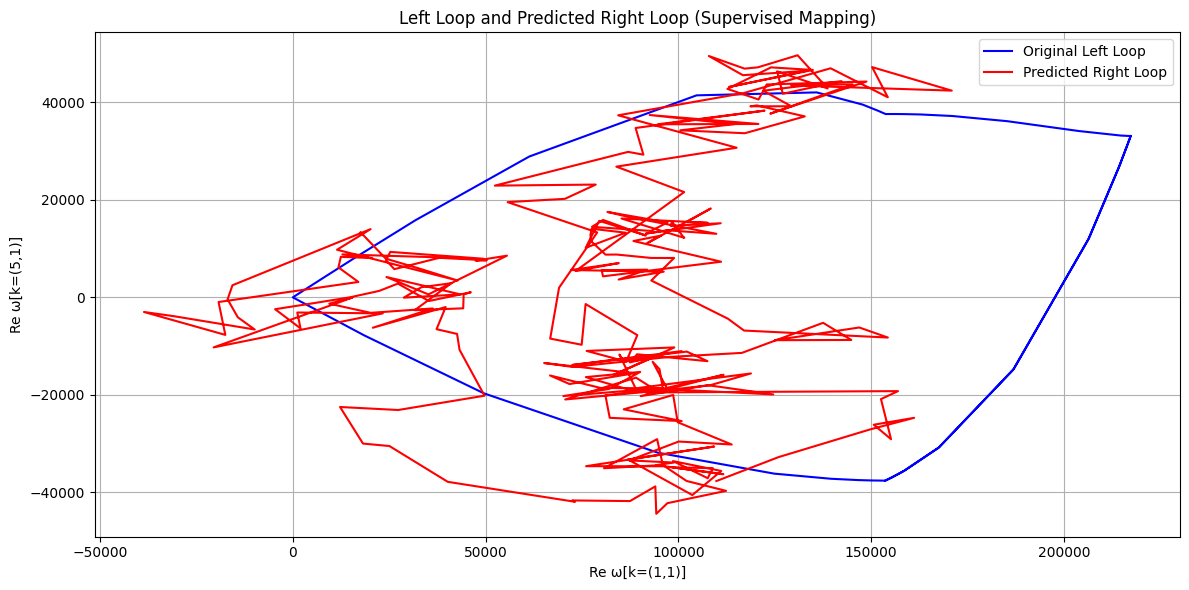

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")

# Set seed
np.random.seed(42)
torch.manual_seed(42)

# Load data
data = np.loadtxt(r"C:\Users\lenovo\Downloads\projection.dat")[:10000]

# Normalize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define loop length (adjust based on your orbit shape)
LOOP_LENGTH = 500
NUM_LOOPS = len(data_scaled) // (2 * LOOP_LENGTH)

# Extract full left/right loop pairs
X, Y = [], []
for i in range(NUM_LOOPS):
    left = data_scaled[i * 2 * LOOP_LENGTH : i * 2 * LOOP_LENGTH + LOOP_LENGTH]
    right = data_scaled[i * 2 * LOOP_LENGTH + LOOP_LENGTH : (i+1) * 2 * LOOP_LENGTH]
    if len(left) == LOOP_LENGTH and len(right) == LOOP_LENGTH:
        X.append(left)
        Y.append(right)

X = np.array(X)
Y = np.array(Y)
print(f"Training samples: {X.shape}, Targets: {Y.shape}")

# Train/test split
split = int(0.85 * len(X))
X_train, X_test = torch.FloatTensor(X[:split]), torch.FloatTensor(X[split:])
Y_train, Y_test = torch.FloatTensor(Y[:split]), torch.FloatTensor(Y[split:])

train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=16, shuffle=True)

# Define model: LSTM encoder + dense decoder
class LeftToRightLoopPredictor(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, loop_len=LOOP_LENGTH):
        super().__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True)
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, loop_len * input_size)
        )
        self.loop_len = loop_len
        self.input_size = input_size

    def forward(self, x):
        _, (h, _) = self.encoder(x)
        z = h[-1]  # Use final hidden state
        out = self.decoder(z)
        return out.view(-1, self.loop_len, self.input_size)

# Initialize
model = LeftToRightLoopPredictor()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Train loop
EPOCHS = 300
print("Training...")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f"Epoch {epoch} Loss: {total_loss / len(train_loader):.6f}")

# Predict from test sample
model.eval()
with torch.no_grad():
    idx = 0  # pick any sample from test set
    left_in = X_test[idx].unsqueeze(0)
    true_right = Y_test[idx]
    pred_right = model(left_in).squeeze(0)
    left_orig = scaler.inverse_transform(left_in.squeeze(0).numpy())
    right_orig = scaler.inverse_transform(true_right.numpy())
    right_pred = scaler.inverse_transform(pred_right.numpy())

# Combine for visualization
complete_pred = np.vstack([left_orig, right_pred])
complete_true = np.vstack([left_orig, right_orig])

# Plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")

# Set seed
np.random.seed(42)
torch.manual_seed(42)

# Load data
data = np.loadtxt(r"C:\Users\lenovo\Downloads\projection.dat")[:5000]

# Normalize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define loop length (adjust based on your orbit shape)
LOOP_LENGTH = 250
NUM_LOOPS = len(data_scaled) // (2 * LOOP_LENGTH)

# Extract full left/right loop pairs
X, Y = [], []
for i in range(NUM_LOOPS):
    left = data_scaled[i * 2 * LOOP_LENGTH : i * 2 * LOOP_LENGTH + LOOP_LENGTH]
    right = data_scaled[i * 2 * LOOP_LENGTH + LOOP_LENGTH : (i+1) * 2 * LOOP_LENGTH]
    if len(left) == LOOP_LENGTH and len(right) == LOOP_LENGTH:
        X.append(left)
        Y.append(right)

X = np.array(X)
Y = np.array(Y)
print(f"Training samples: {X.shape}, Targets: {Y.shape}")

# Train/test split
split = int(0.85 * len(X))
X_train, X_test = torch.FloatTensor(X[:split]), torch.FloatTensor(X[split:])
Y_train, Y_test = torch.FloatTensor(Y[:split]), torch.FloatTensor(Y[split:])

train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=16, shuffle=True)

# Define model: LSTM encoder + dense decoder
class LeftToRightLoopPredictor(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, loop_len=LOOP_LENGTH):
        super().__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True)
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, loop_len * input_size)
        )
        self.loop_len = loop_len
        self.input_size = input_size

    def forward(self, x):
        _, (h, _) = self.encoder(x)
        z = h[-1]  # Use final hidden state
        out = self.decoder(z)
        return out.view(-1, self.loop_len, self.input_size)

# Initialize
model = LeftToRightLoopPredictor()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Train loop
EPOCHS = 300
print("Training...")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f"Epoch {epoch} Loss: {total_loss / len(train_loader):.6f}")

# Predict from test sample
model.eval()
with torch.no_grad():
    idx = 0  # pick any sample from test set
    left_in = X_test[idx].unsqueeze(0)
    true_right = Y_test[idx]
    pred_right = model(left_in).squeeze(0)
    left_orig = scaler.inverse_transform(left_in.squeeze(0).numpy())
    right_orig = scaler.inverse_transform(true_right.numpy())
    right_pred = scaler.inverse_transform(pred_right.numpy())

# Combine for visualization
complete_pred = np.vstack([left_orig, right_pred])
complete_true = np.vstack([left_orig, right_orig])

# Plot
# Plot only original left loop and predicted right loop
plt.figure(figsize=(12, 6))
plt.plot(left_orig[:, 0], left_orig[:, 1], label='Original Left Loop', color='blue')
plt.plot(right_pred[:, 0], right_pred[:, 1], label='Predicted Right Loop', color='red')
plt.title("Left Loop and Predicted Right Loop (Supervised Mapping)")
plt.xlabel("Re ω[k=(1,1)]")
plt.ylabel("Re ω[k=(5,1)]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Total data points loaded: 10000
Detected loop pairs: 10
Prepared Training Samples: X=(10, 500, 2), Y=(10, 500, 2)
Training...
Epoch 0 Loss: 1.003613
Epoch 20 Loss: 0.605243
Epoch 40 Loss: 0.390087
Epoch 60 Loss: 0.246999
Epoch 80 Loss: 0.106028
Epoch 100 Loss: 0.056934
Epoch 120 Loss: 0.152259
Epoch 140 Loss: 0.093072
Epoch 160 Loss: 0.068440
Epoch 180 Loss: 0.005353
Epoch 200 Loss: 0.119097
Epoch 220 Loss: 0.081189
Epoch 240 Loss: 0.031448
Epoch 260 Loss: 0.382395
Epoch 280 Loss: 0.103199


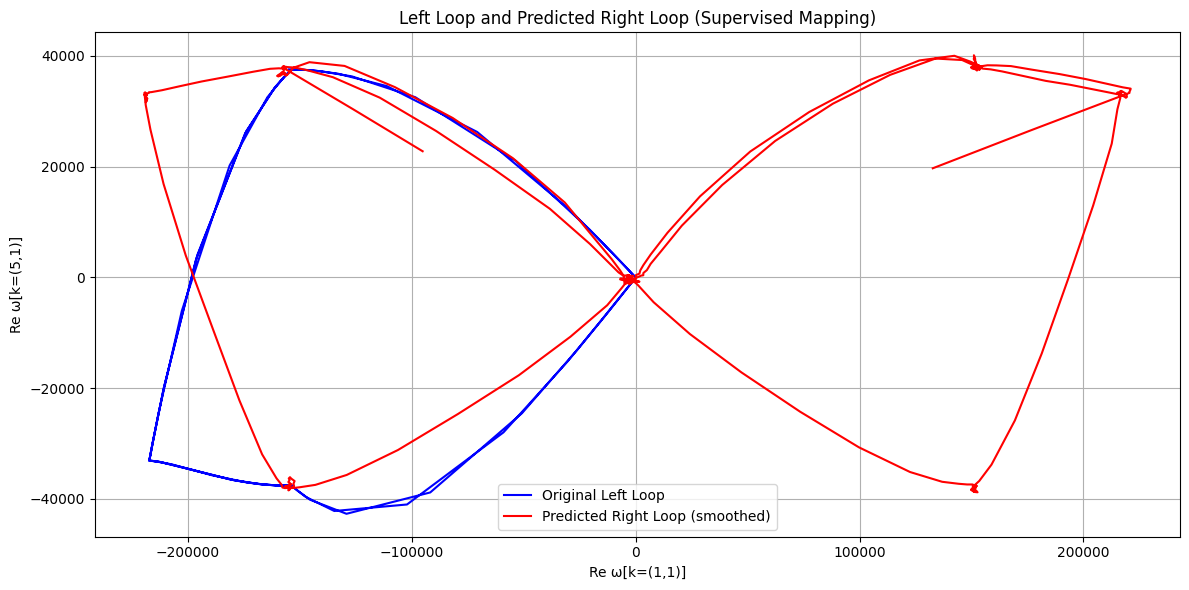

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")

# ======================= SETUP =======================
np.random.seed(42)
torch.manual_seed(42)

# Load data (first 10,000 points)
data = np.loadtxt(r"C:\Users\lenovo\Downloads\projection.dat")[:10000]
print(f"Total data points loaded: {len(data)}")

# ======================= NORMALIZE =======================
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# ======================= LOOP PAIR EXTRACTION =======================
LOOP_LENGTH = 500
NUM_LOOPS = len(data_scaled) // (2 * LOOP_LENGTH)
print(f"Detected loop pairs: {NUM_LOOPS}")

X, Y = [], []
for i in range(NUM_LOOPS):
    start = i * 2 * LOOP_LENGTH
    left = data_scaled[start : start + LOOP_LENGTH]
    right = data_scaled[start + LOOP_LENGTH : start + 2 * LOOP_LENGTH]
    if len(left) == LOOP_LENGTH and len(right) == LOOP_LENGTH:
        X.append(left)
        Y.append(right)

X = np.array(X)
Y = np.array(Y)
print(f"Prepared Training Samples: X={X.shape}, Y={Y.shape}")

# ======================= TRAIN-TEST SPLIT =======================
split = int(0.85 * len(X))
X_train, X_test = torch.FloatTensor(X[:split]), torch.FloatTensor(X[split:])
Y_train, Y_test = torch.FloatTensor(Y[:split]), torch.FloatTensor(Y[split:])
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=16, shuffle=True)

# ======================= MODEL =======================
class LeftToRightLoopPredictor(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, loop_len=LOOP_LENGTH):
        super().__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True, dropout=0.3)
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, loop_len * input_size)
        )
        self.loop_len = loop_len
        self.input_size = input_size

    def forward(self, x):
        _, (h, _) = self.encoder(x)
        z = h[-1]  # Final hidden state
        out = self.decoder(z)
        return out.view(-1, self.loop_len, self.input_size)

model = LeftToRightLoopPredictor()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# ======================= TRAINING =======================
EPOCHS = 300
print("Training...")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f"Epoch {epoch} Loss: {total_loss / len(train_loader):.6f}")

# ======================= INFERENCE =======================
model.eval()
with torch.no_grad():
    idx = 0  # Change to try other test examples
    left_in = X_test[idx].unsqueeze(0)
    true_right = Y_test[idx]
    pred_right = model(left_in).squeeze(0)

# ======================= INVERSE TRANSFORM =======================
left_orig = scaler.inverse_transform(left_in.squeeze(0).numpy())
right_orig = scaler.inverse_transform(true_right.numpy())
right_pred = scaler.inverse_transform(pred_right.numpy())

# ======================= OPTIONAL SMOOTHING =======================
def smooth_curve(x, window=5):
    return np.convolve(x, np.ones(window)/window, mode='same')

# Smooth predictions (optional)
right_pred[:, 0] = smooth_curve(right_pred[:, 0])
right_pred[:, 1] = smooth_curve(right_pred[:, 1])

# ======================= PLOTTING =======================
plt.figure(figsize=(12, 6))
plt.plot(left_orig[:, 0], left_orig[:, 1], label='Original Left Loop', color='blue')
plt.plot(right_pred[:, 0], right_pred[:, 1], label='Predicted Right Loop (smoothed)', color='red')
plt.title("Left Loop and Predicted Right Loop (Supervised Mapping)")
plt.xlabel("Re ω[k=(1,1)]")
plt.ylabel("Re ω[k=(5,1)]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Total data points loaded: 10000
Detected loop pairs: 10
Prepared Training Samples: X=(10, 500, 2), Y=(10, 500, 2)
Training...
Epoch 0 Loss: 1.003331
Epoch 20 Loss: 0.469404
Epoch 40 Loss: 0.147793
Epoch 60 Loss: 0.042695
Epoch 80 Loss: 0.011516
Epoch 100 Loss: 0.003887
Epoch 120 Loss: 0.002800
Epoch 140 Loss: 0.002072
Epoch 160 Loss: 0.000769
Epoch 180 Loss: 0.000577
Epoch 200 Loss: 0.000252
Epoch 220 Loss: 0.000268
Epoch 240 Loss: 0.000234
Epoch 260 Loss: 0.000150
Epoch 280 Loss: 0.000216


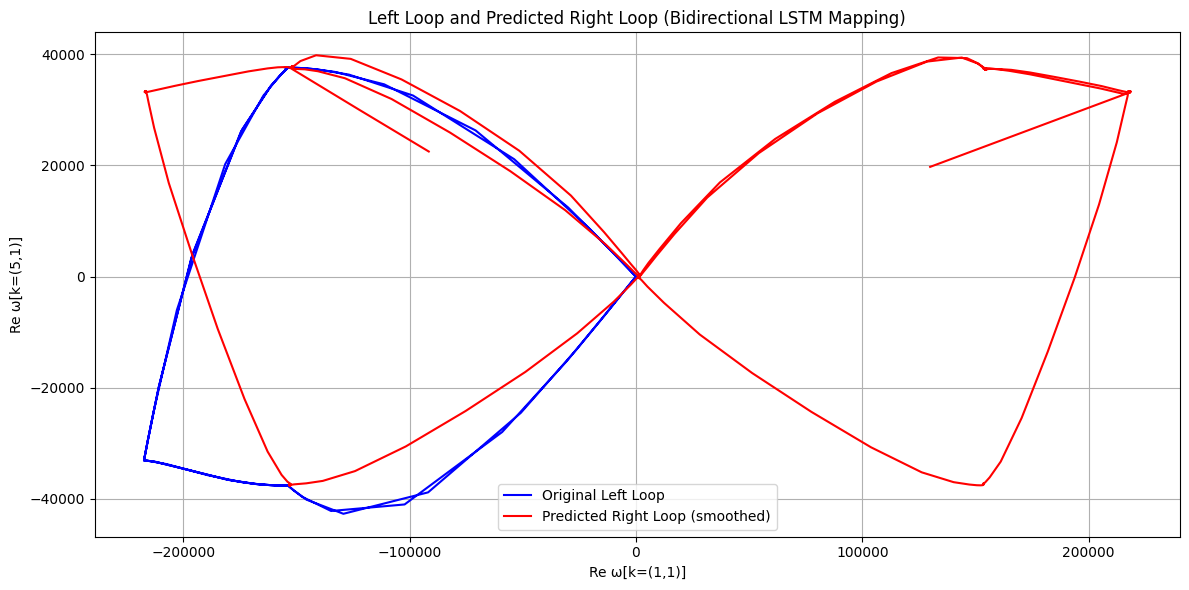

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")

# ======================= SETUP =======================
np.random.seed(42)
torch.manual_seed(42)

# Load data (first 10,000 points)
data = np.loadtxt(r"C:\Users\lenovo\Downloads\projection.dat")[:10000]
print(f"Total data points loaded: {len(data)}")

# ======================= NORMALIZE =======================
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# ======================= LOOP PAIR EXTRACTION =======================
LOOP_LENGTH = 500
NUM_LOOPS = len(data_scaled) // (2 * LOOP_LENGTH)
print(f"Detected loop pairs: {NUM_LOOPS}")

X, Y = [], []
for i in range(NUM_LOOPS):
    start = i * 2 * LOOP_LENGTH
    left = data_scaled[start : start + LOOP_LENGTH]
    right = data_scaled[start + LOOP_LENGTH : start + 2 * LOOP_LENGTH]
    if len(left) == LOOP_LENGTH and len(right) == LOOP_LENGTH:
        X.append(left)
        Y.append(right)

X = np.array(X)
Y = np.array(Y)
print(f"Prepared Training Samples: X={X.shape}, Y={Y.shape}")

# ======================= TRAIN-TEST SPLIT =======================
split = int(0.85 * len(X))
X_train, X_test = torch.FloatTensor(X[:split]), torch.FloatTensor(X[split:])
Y_train, Y_test = torch.FloatTensor(Y[:split]), torch.FloatTensor(Y[split:])
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=16, shuffle=True)

# ======================= MODEL =======================
class BiLSTMEncoderDecoder(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, loop_len=LOOP_LENGTH):
        super().__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers=2,
                               batch_first=True, dropout=0.3, bidirectional=True)
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size * 2, 256),
            nn.ReLU(),
            nn.Linear(256, loop_len * input_size)
        )
        self.loop_len = loop_len
        self.input_size = input_size

    def forward(self, x):
        _, (h, _) = self.encoder(x)
        z = torch.cat([h[-2], h[-1]], dim=1)  # concat last hidden states of both directions
        out = self.decoder(z)
        return out.view(-1, self.loop_len, self.input_size)

# ======================= TRAINING =======================
model = BiLSTMEncoderDecoder()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

EPOCHS = 300
print("Training...")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f"Epoch {epoch} Loss: {total_loss / len(train_loader):.6f}")

# ======================= INFERENCE =======================
model.eval()
with torch.no_grad():
    idx = 0  # Change this index to test different loops
    left_in = X_test[idx].unsqueeze(0)
    true_right = Y_test[idx]
    pred_right = model(left_in).squeeze(0)

# ======================= INVERSE TRANSFORM =======================
left_orig = scaler.inverse_transform(left_in.squeeze(0).numpy())
right_orig = scaler.inverse_transform(true_right.numpy())
right_pred = scaler.inverse_transform(pred_right.numpy())

# ======================= OPTIONAL SMOOTHING =======================
def smooth_curve(x, window=5):
    return np.convolve(x, np.ones(window)/window, mode='same')

right_pred[:, 0] = smooth_curve(right_pred[:, 0])
right_pred[:, 1] = smooth_curve(right_pred[:, 1])

# ======================= PLOTTING =======================
plt.figure(figsize=(12, 6))
plt.plot(left_orig[:, 0], left_orig[:, 1], label='Original Left Loop', color='blue')
plt.plot(right_pred[:, 0], right_pred[:, 1], label='Predicted Right Loop (smoothed)', color='red')
plt.title("Left Loop and Predicted Right Loop (Bidirectional LSTM Mapping)")
plt.xlabel("Re ω[k=(1,1)]")
plt.ylabel("Re ω[k=(5,1)]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
